<center><h1><b><u>Script to Demonstrate COCO API Usage</u></b></h1></center>

The COCO API is developed and maintained by developers of the COCO dataset and offers tools for interacting with it. You can install the API from the terminal with `conda install -c conda-forge pycocotools`.

In [1]:
# `pycocotools` is the library for the Python API
# The library can be installed from the conda-forge repo.
from pycocotools.coco import COCO

In [2]:
# other libraries needed to work with the data
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

In [3]:
# I have the COCO dataset stored on an external hard drive
# so the following is also useful:
from pathlib import PurePath
p = PurePath("/media/tamer/Samsung_T5/COCO_data")  # --> substitute with your local directory

<br>

Make sure you have the annotations for COCO stored in a local directory. You can download them [here](http://cocodataset.org/#download). The file you want is <u>2017 Train/Val annotations</u>.

In [4]:
# Define the directory and file location.
dataDir=str(p)
dataType='val2017'  # --> substitute with 'train2017' for training set
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
# Initialize the api and index the annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.40s)
creating index...
index created!


In [5]:
# Display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms = [cat['name'] for cat in cats]
s_nms = set([cat['supercategory'] for cat in cats])
catTtl = "COCO Categories"
scatTtl = "COCO Supercategories"
print('\n'+catTtl+':', '\n'+'-'*len(catTtl), '\n{}\n'.format('; '.join(nms)))
print('\n'+scatTtl+':', '\n'+'-'*len(scatTtl), '\n{}\n'.format('; '.join(s_nms)))


COCO Categories: 
--------------- 
person; bicycle; car; motorcycle; airplane; bus; train; truck; boat; traffic light; fire hydrant; stop sign; parking meter; bench; bird; cat; dog; horse; sheep; cow; elephant; bear; zebra; giraffe; backpack; umbrella; handbag; tie; suitcase; frisbee; skis; snowboard; sports ball; kite; baseball bat; baseball glove; skateboard; surfboard; tennis racket; bottle; wine glass; cup; fork; knife; spoon; bowl; banana; apple; sandwich; orange; broccoli; carrot; hot dog; pizza; donut; cake; chair; couch; potted plant; bed; dining table; toilet; tv; laptop; mouse; remote; keyboard; cell phone; microwave; oven; toaster; sink; refrigerator; book; clock; vase; scissors; teddy bear; hair drier; toothbrush


COCO Supercategories: 
-------------------- 
outdoor; person; accessory; food; kitchen; indoor; vehicle; animal; furniture; electronic; sports; appliance



<br>

Categories can be filtered by supercategory, category or category ID. Use `getCatIds()` method and enter a list of the object categories to search for in images. For example, enter `[person, sports, tennis racket]` for images tagged with all three items.

In [12]:
# Return the category ID's for labels:
catIds = coco.getCatIds(catNms=['person', 'horse', 'cow'])
# Get the image ID's with those labels
imgIds = coco.getImgIds(catIds=catIds )
# Select a random image from the returned images
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
# Use scikit-image and pyplot to read the image and display it.
# From a local directory:
Img_local = io.imread('%s/%s/%s'%(dataDir, dataType, img['file_name']))
# From the web with URL:
Img_url = io.imread(img['coco_url'])

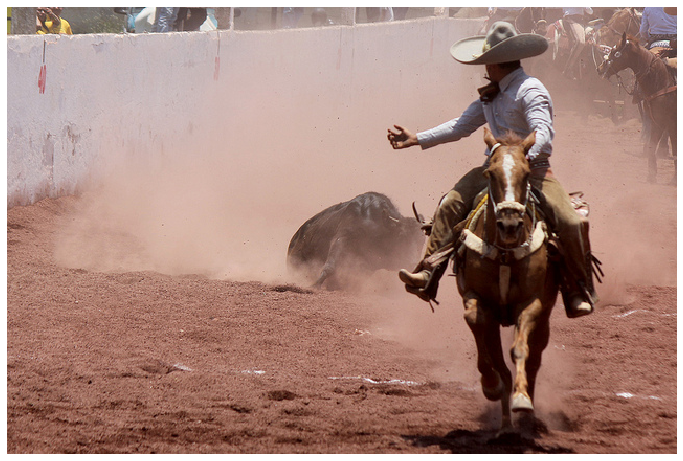

In [13]:
pylab.rcParams['figure.figsize'] = (12.0, 16.0)
plt.axis('off')
# plt.imshow(Img_local)
plt.imshow(Img_url)
plt.show()

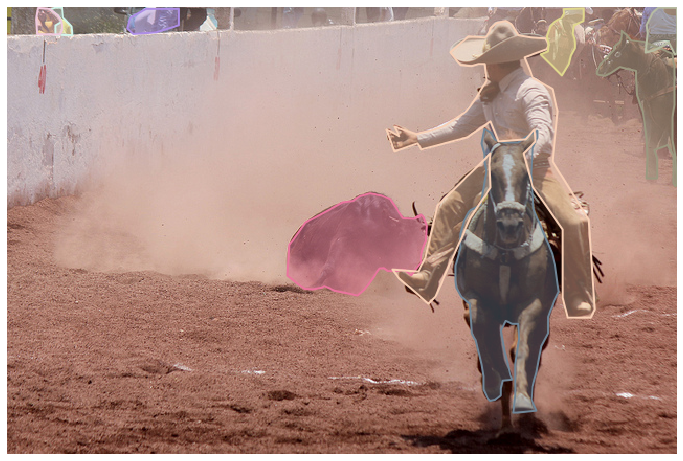

In [14]:
# load and display instance annotations
# plt.imshow(Img_local); plt.axis('off')
plt.imshow(Img_url); plt.axis('off')

annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)